In [1]:
import math;
import numpy  as np;
import pandas as pd;
import matplotlib.pyplot as plt;
import seaborn as sns;

In [2]:
nba = pd.read_csv("https://raw.githubusercontent.com/benvictoria17/DataAnalytics/main/dataset/NBA%20Players/all_seasons.csv", index_col = 0)


pd.set_option('display.max_columns', None)
nba.head()

,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,Travis Knight,LAL,22.0,213.36,106.59412,Connecticut,USA,1996,1,29,71,4.8,4.5,0.5,6.2,0.127,0.182,0.142,0.536,0.052,1996-97
1,Matt Fish,MIA,27.0,210.82,106.59412,North Carolina-Wilmington,USA,1992,2,50,6,0.3,0.8,0.0,-15.1,0.143,0.267,0.265,0.333,0.000,1996-97
2,Matt Bullard,HOU,30.0,208.28,106.59412,Iowa,USA,Undrafted,Undrafted,Undrafted,71,4.5,1.6,0.9,0.9,0.016,0.115,0.151,0.535,0.099,1996-97
3,Marty Conlon,BOS,29.0,210.82,111.13004,Providence,USA,Undrafted,Undrafted,Undrafted,74,7.8,4.4,1.4,-9.0,0.083,0.152,0.167,0.542,0.101,1996-97
4,Martin Muursepp,DAL,22.0,205.74,106.59412,None,USA,1996,1,25,42,3.7,1.6,0.5,-14.5,0.109,0.118,0.233,0.482,0.114,1996-97


In [3]:
nba.shape

(11700, 21)

In [4]:
nba.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11700 entries, 0 to 11699
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   player_name        11700 non-null  object 
 1   team_abbreviation  11700 non-null  object 
 2   age                11700 non-null  float64
 3   player_height      11700 non-null  float64
 4   player_weight      11700 non-null  float64
 5   college            11700 non-null  object 
 6   country            11700 non-null  object 
 7   draft_year         11700 non-null  object 
 8   draft_round        11700 non-null  object 
 9   draft_number       11700 non-null  object 
 10  gp                 11700 non-null  int64  
 11  pts                11700 non-null  float64
 12  reb                11700 non-null  float64
 13  ast                11700 non-null  float64
 14  net_rating         11700 non-null  float64
 15  oreb_pct           11700 non-null  float64
 16  dreb_pct           117

In [5]:
nba.describe()

,age,player_height,player_weight,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct
count,11700.000000,11700.000000,11700.000000,11700.000000,11700.000000,11700.000000,11700.000000,11700.000000,11700.000000,11700.000000,11700.000000,11700.000000,11700.000000
mean,27.131966,200.728501,100.526791,51.717179,8.169299,3.564957,1.811179,-2.166410,0.054981,0.141534,0.185380,0.510402,0.131228
std,4.340006,9.169827,12.526481,24.985236,5.956115,2.487498,1.792117,12.076914,0.043595,0.062793,0.052957,0.098306,0.094244
min,18.000000,160.020000,60.327736,1.000000,0.000000,0.000000,0.000000,-200.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,24.000000,193.040000,90.718400,32.000000,3.600000,1.800000,0.600000,-6.300000,0.021000,0.096000,0.150000,0.479000,0.065000
50%,26.000000,200.660000,99.790240,58.000000,6.700000,3.000000,1.200000,-1.300000,0.042000,0.132000,0.182000,0.523000,0.103000
75%,30.000000,208.280000,108.862080,74.000000,11.500000,4.700000,2.400000,3.200000,0.084000,0.180000,0.218000,0.559000,0.178000
max,44.000000,231.140000,163.293120,85.000000,36.100000,16.300000,11.700000,300.000000,1.000000,1.000000,1.000000,1.500000,1.000000


In [6]:
nba_org = nba

In [7]:
def valoresNulos(datos):
    total = datos.isnull().sum().sort_values(ascending=False)
    percent = (datos.isnull().sum()/datos.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis = 1, keys=['Total', 'Percent'])
    
    return missing_data.head(22)
valoresNulos(nba)

,Total,Percent
player_name,0,0.0
pts,0,0.0
ast_pct,0,0.0
ts_pct,0,0.0
usg_pct,0,0.0
dreb_pct,0,0.0
oreb_pct,0,0.0
net_rating,0,0.0
ast,0,0.0
reb,0,0.0


In [8]:
print(f'Total de filas duplicadas: {nba.duplicated().sum()}')

Total de filas duplicadas: 0


In [9]:
jugador_pais = nba[['player_name', 'country']]
print(f'Total de filas duplicadas: {jugador_pais.duplicated().sum()}')

Total de filas duplicadas: 9359


In [10]:
jugador_pais_limpio = jugador_pais.drop_duplicates()
print(f'Total de filas duplicadas: {jugador_pais_limpio.duplicated().sum()}')

Total de filas duplicadas: 0


In [11]:
jugador_pais_limpio.shape

(2341, 2)

In [12]:
jugador_pais_limpio["country"].value_counts()

USA           1971
Canada          36
France          31
Australia       17
Croatia         15
              ... 
Ireland          1
USSR             1
Scotland         1
Sudan (UK)       1
Guinea           1
Name: country, Length: 79, dtype: int64

In [13]:
usa = jugador_pais_limpio[jugador_pais_limpio['country'] == 'USA'].count().country
no_usa = jugador_pais_limpio[jugador_pais_limpio['country'] != 'USA'].count().country

total = usa+no_usa

pct_usa = round(100 * (usa / total), 2)
pct_no_usa = round(100 * (no_usa / total), 2)

print(pct_usa, pct_no_usa)

84.19 15.81


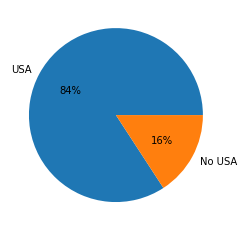

In [14]:
data = [pct_usa, pct_no_usa]

labels = ['USA', 'No USA'] 

plt.pie(data, labels = labels, autopct='%.0f%%')
plt.show()

In [15]:
usa97 = nba[(nba['country'] == 'USA') & (nba['season'] == '1996-97')].count().country
no_usa97 = nba[(nba['country'] != 'USA') & (nba['season'] == '1996-97')].count().country

total = usa97 + no_usa97

pct_usa97 = round(100 * (usa97 / total), 2)
pct_no_usa97 = round(100 * (no_usa97 / total), 2)

print(pct_usa97, pct_no_usa97)

97.96 2.04


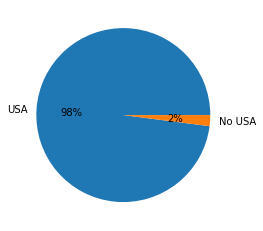

In [16]:
data = [pct_usa97, pct_no_usa97]

labels = ['USA', 'No USA'] 

plt.pie(data, labels = labels, autopct='%.0f%%')
plt.show()

In [17]:
usa20 = nba[(nba['country'] == 'USA') & (nba['season'] == '2020-21')].count().country
no_usa20 = nba[(nba['country'] != 'USA') & (nba['season'] == '2020-21')].count().country

total = usa20 + no_usa20

pct_usa20 = round(100 * (usa20 / total), 2)
pct_no_usa20 = round(100 * (no_usa20 / total), 2)

print(pct_usa20, pct_no_usa)

77.04 15.81


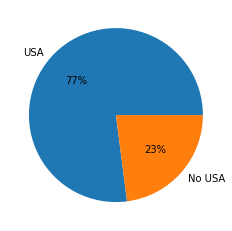

In [18]:
data = [pct_usa20, pct_no_usa20]

labels = ['USA', 'No USA'] 

plt.pie(data, labels = labels, autopct='%.0f%%')
plt.show()

In [19]:
temporada = nba[['player_name', 'country', 'season']]
temporada.loc[temporada.country != 'USA', 'country'] = 'No USA'
temporada.head()

/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


,player_name,country,season
0,Travis Knight,USA,1996-97
1,Matt Fish,USA,1996-97
2,Matt Bullard,USA,1996-97
3,Marty Conlon,USA,1996-97
4,Martin Muursepp,USA,1996-97


<AxesSubplot:xlabel='season', ylabel='count'>

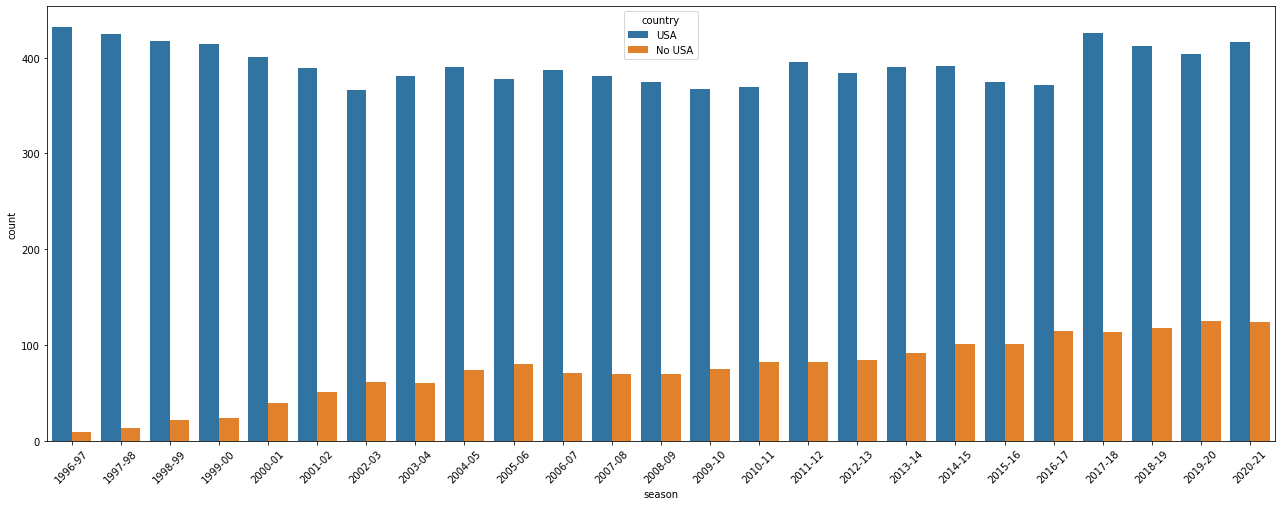

In [20]:
plt.figure(figsize=(22,8))
plt.xticks(rotation=45)
sns.countplot(data=temporada, x = 'season', hue = 'country')

<AxesSubplot:xlabel='count', ylabel='country'>

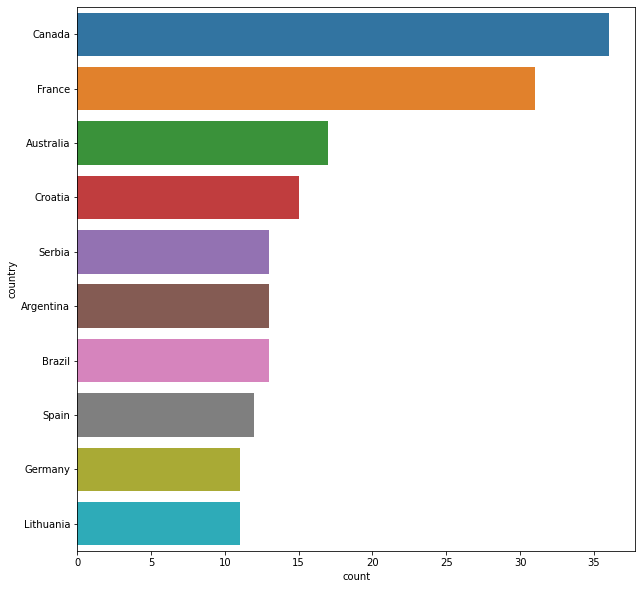

In [21]:
resto = jugador_pais_limpio[jugador_pais_limpio['country'] != 'USA']
plt.figure(figsize=(10,10))
sns.countplot(data=resto, y="country", order = resto['country'].value_counts().iloc[:10].index)

<AxesSubplot:xlabel='player_weight', ylabel='Count'>

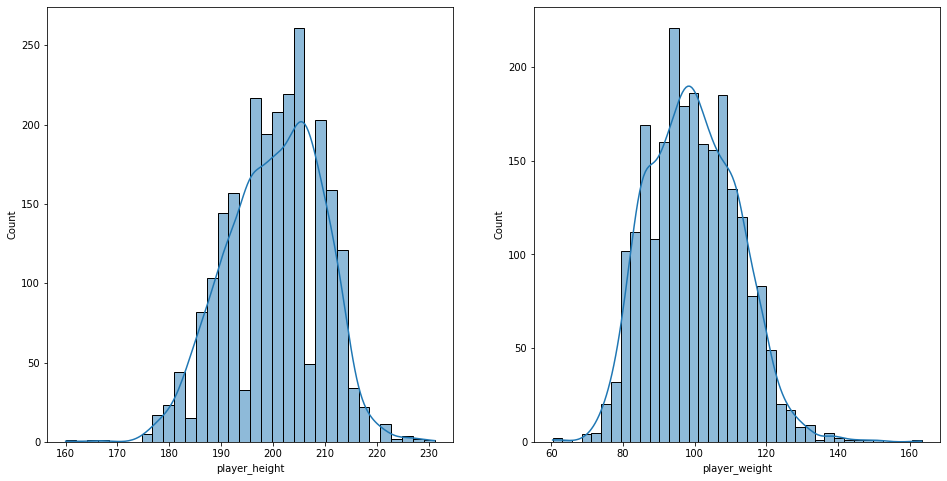

In [22]:
altura_peso = nba.groupby('player_name').agg({'player_height': 'mean', 'player_weight':'mean'})
fig, ax = plt.subplots(1,2,figsize=(16, 8))

sns.histplot(altura_peso['player_height'], kde=True, ax=ax[0])
sns.histplot(altura_peso['player_weight'], kde=True, ax=ax[1])

In [23]:
corr_matrix = altura_peso.corr()

corr_matrix

,player_height,player_weight
player_height,1.000000,0.825004
player_weight,0.825004,1.000000


In [24]:
nba.draft_number.unique()

array(['29', '50', 'Undrafted', '25', '30', '18', '31', '48', '21', '160',
       '2', '46', '14', '44', '3', '28', '7', '13', '42', '52', '1', '9',
       '22', '8', '37', '11', '12', '33', '24', '5', '69', '35', '10',
       '38', '16', '6', '39', '32', '4', '19', '23', '36', '63', '20',
       '41', '26', '47', '15', '124', '43', '51', '40', '56', '17', '54',
       '139', '127', '27', '75', '165', '45', '57', '53', '34', '49',
       '79', '58', '66', '87', '120', '55', '82', '60', '59', '78', '0'],
      dtype=object)

In [25]:
nba['draft_number'].replace('Undrafted','61',inplace=True)
nba['draft_number'] = pd.to_numeric(nba['draft_number'])
stats = ['gp', 'pts', 'reb', 'ast']
avg_per_pick = nba.groupby(['draft_number'])[stats].mean().reset_index()
avg_per_pick.set_index('draft_number')

,gp,pts,reb,ast
draft_number,,,,
0,5.500000,4.900000,0.900000,1.650000
1,59.491018,16.339222,7.192515,2.971856
2,62.210356,12.297411,5.762783,2.690615
3,61.236422,14.654952,5.153355,3.197764
4,61.844720,12.589130,5.197205,2.932609
...,...,...,...,...
124,9.000000,0.450000,0.800000,0.300000
127,17.000000,6.800000,1.800000,1.500000
139,21.000000,3.300000,1.100000,1.900000


<AxesSubplot:xlabel='draft_number', ylabel='gp'>

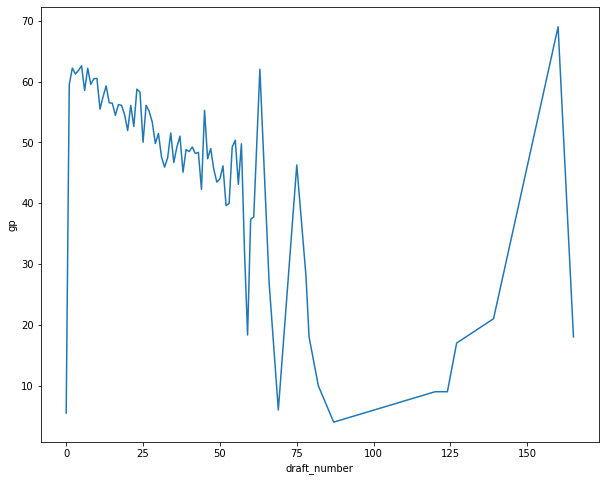

In [26]:
plt.figure(figsize=(10,8))
sns.lineplot(data=avg_per_pick, x="draft_number", y="gp")

<AxesSubplot:xlabel='draft_number', ylabel='pts'>

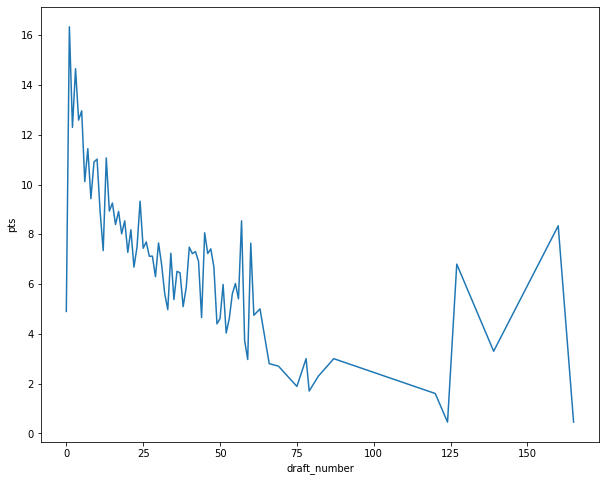

In [27]:
plt.figure(figsize=(10,8))
sns.lineplot(data=avg_per_pick, x="draft_number", y="pts")

<AxesSubplot:xlabel='draft_number', ylabel='ast'>

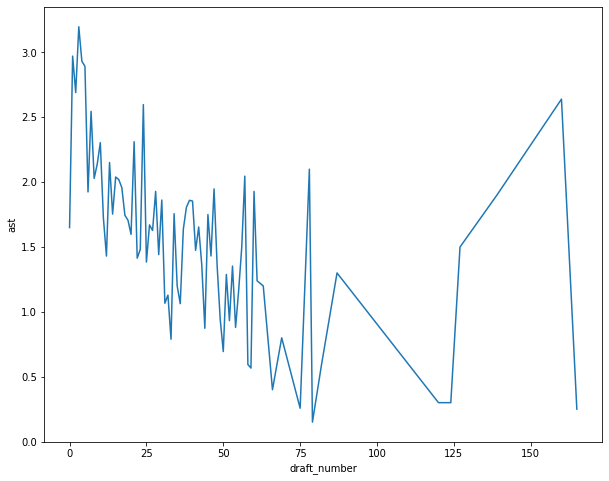

In [28]:
plt.figure(figsize=(10,8))
sns.lineplot(data=avg_per_pick, x="draft_number", y="ast")

<AxesSubplot:xlabel='draft_number', ylabel='reb'>

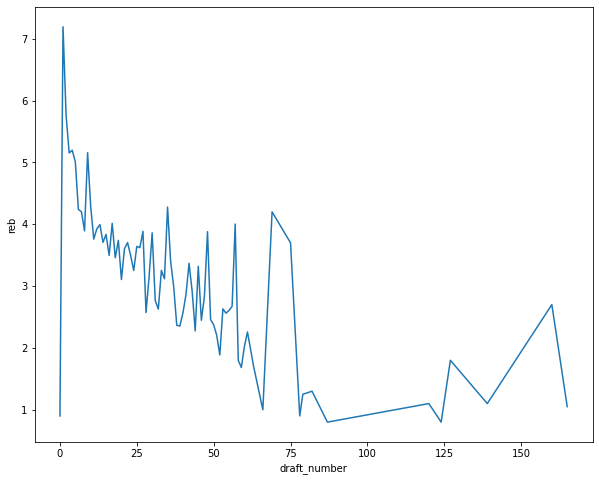

In [29]:
plt.figure(figsize=(10,8))
sns.lineplot(data=avg_per_pick, x="draft_number", y="reb")

In [30]:
nba = nba_org
stats = nba.groupby('player_name').agg({'gp': 'sum', 'pts':'mean', 'reb': 'mean', 'ast':'mean'})
stats = stats.sort_values('gp',ascending=False)
stats.head()

,gp,pts,reb,ast
player_name,,,,
Vince Carter,1541,16.345455,4.227273,2.972727
Dirk Nowitzki,1522,20.109524,7.347619,2.338095
Jason Terry,1410,12.884211,2.247368,3.689474
Tim Duncan,1392,18.889474,10.768421,3.010526
Kevin Garnett,1382,17.350000,9.830000,3.630000


In [31]:
stats['pts_total'] = round(stats.gp * stats.pts)
stats['reb_total'] = round(stats.gp * stats.reb)
stats['ast_total'] = round(stats.gp * stats.ast)
column = stats.pop('pts_total')
stats.insert(2, 'pts_total', column)

column = stats.pop('reb_total')
stats.insert(4, 'reb_total', column)

column = stats.pop('ast_total')
stats.insert(6, 'ast_total', column)
stats.head()

,gp,pts,pts_total,reb,reb_total,ast,ast_total
player_name,,,,,,,
Vince Carter,1541,16.345455,25188.0,4.227273,6514.0,2.972727,4581.0
Dirk Nowitzki,1522,20.109524,30607.0,7.347619,11183.0,2.338095,3559.0
Jason Terry,1410,12.884211,18167.0,2.247368,3169.0,3.689474,5202.0
Tim Duncan,1392,18.889474,26294.0,10.768421,14990.0,3.010526,4191.0
Kevin Garnett,1382,17.350000,23978.0,9.830000,13585.0,3.630000,5017.0


In [32]:
stats.sort_values('pts_total',ascending=False).head(10)

,gp,pts,pts_total,reb,reb_total,ast,ast_total
player_name,,,,,,,
LeBron James,1310,26.933333,35283.0,7.461111,9774.0,7.433333,9738.0
Kobe Bryant,1346,24.200000,32573.0,5.200000,6999.0,4.760000,6407.0
Dirk Nowitzki,1522,20.109524,30607.0,7.347619,11183.0,2.338095,3559.0
Carmelo Anthony,1191,22.500000,26798.0,6.272222,7470.0,2.727778,3249.0
Tim Duncan,1392,18.889474,26294.0,10.768421,14990.0,3.010526,4191.0
Paul Pierce,1343,18.931579,25425.0,5.436842,7302.0,3.357895,4510.0
Vince Carter,1541,16.345455,25188.0,4.227273,6514.0,2.972727,4581.0
Ray Allen,1300,18.883333,24548.0,4.050000,5265.0,3.377778,4391.0
Kevin Garnett,1382,17.350000,23978.0,9.830000,13585.0,3.630000,5017.0


In [33]:
stats.sort_values('reb_total',ascending=False).head(10)

,gp,pts,pts_total,reb,reb_total,ast,ast_total
player_name,,,,,,,
Tim Duncan,1392,18.889474,26294.0,10.768421,14990.0,3.010526,4191.0
Dwight Howard,1182,15.929412,18829.0,11.858824,14017.0,1.329412,1571.0
Kevin Garnett,1382,17.350000,23978.0,9.830000,13585.0,3.630000,5017.0
Dirk Nowitzki,1522,20.109524,30607.0,7.347619,11183.0,2.338095,3559.0
Pau Gasol,1226,16.561111,20304.0,9.044444,11088.0,3.155556,3869.0
Tyson Chandler,1160,7.821053,9072.0,8.721053,10116.0,0.794737,922.0
Zach Randolph,1116,16.205882,18086.0,8.894118,9926.0,1.805882,2015.0
Ben Wallace,1088,5.393750,5868.0,9.100000,9901.0,1.225000,1333.0
Shawn Marion,1163,14.762500,17169.0,8.500000,9886.0,1.868750,2173.0


In [34]:
stats.sort_values('ast_total',ascending=False).head(10)

,gp,pts,pts_total,reb,reb_total,ast,ast_total
player_name,,,,,,,
Jason Kidd,1231,12.376471,15235.0,6.241176,7683.0,8.682353,10688.0
Chris Paul,1090,18.287500,19933.0,4.512500,4919.0,9.400000,10246.0
Steve Nash,1217,13.522222,16457.0,2.911111,3543.0,8.161111,9932.0
LeBron James,1310,26.933333,35283.0,7.461111,9774.0,7.433333,9738.0
Andre Miller,1304,12.047059,15709.0,3.576471,4664.0,6.347059,8277.0
Russell Westbrook,943,23.292308,21965.0,7.407692,6985.0,8.492308,8008.0
Rajon Rondo,918,9.940000,9125.0,4.606667,4229.0,8.173333,7503.0
Tony Parker,1254,15.372222,19277.0,2.661111,3337.0,5.588889,7008.0
Deron Williams,845,16.358333,13823.0,3.100000,2620.0,8.025000,6781.0


In [35]:
corr_matrix = stats.corr()

corr_matrix

,gp,pts,pts_total,reb,reb_total,ast,ast_total
gp,1.000000,0.649909,0.876544,0.565442,0.853329,0.495584,0.750985
pts,0.649909,1.000000,0.799401,0.675374,0.642672,0.699784,0.649638
pts_total,0.876544,0.799401,1.000000,0.568066,0.847814,0.586731,0.832610
reb,0.565442,0.675374,0.568066,1.000000,0.772882,0.300359,0.347249
reb_total,0.853329,0.642672,0.847814,0.772882,1.000000,0.368415,0.608554
ast,0.495584,0.699784,0.586731,0.300359,0.368415,1.000000,0.799465
ast_total,0.750985,0.649638,0.832610,0.347249,0.608554,0.799465,1.000000


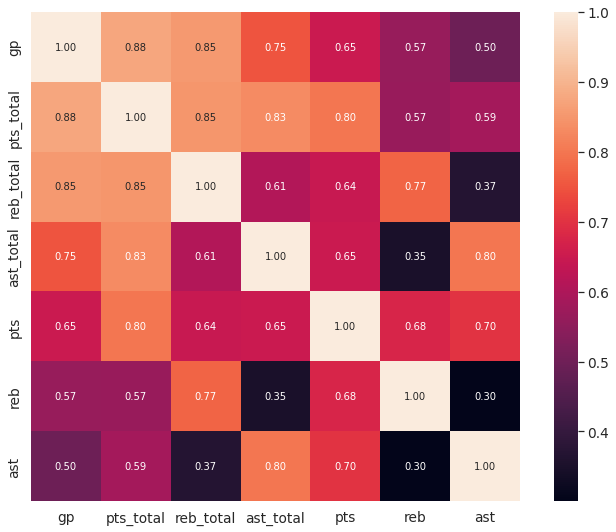

In [36]:
k = 7
cols = ['gp', 'pts', 'pts_total', 'reb', 'reb_total', 'ast', 'ast_total']
cols = corr_matrix.nlargest(k, 'gp')['gp'].index
cm = np.corrcoef(stats[cols].values.T)
sns.set(font_scale=1.25)
plt.subplots(figsize = (12,9))
hm = sns.heatmap(cm, cbar=True, annot=True,
                 square = True, fmt = '.2f',
                 annot_kws = {'size':10},
                 yticklabels=cols.values,
                 xticklabels=cols.values
                 )

plt.show()

In [37]:
nba['position'] = nba.player_height.apply(lambda x: 'Center' if x >= 208 else 'Guard' if x <= 193 else 'Forward')

<AxesSubplot:xlabel='season', ylabel='pts'>

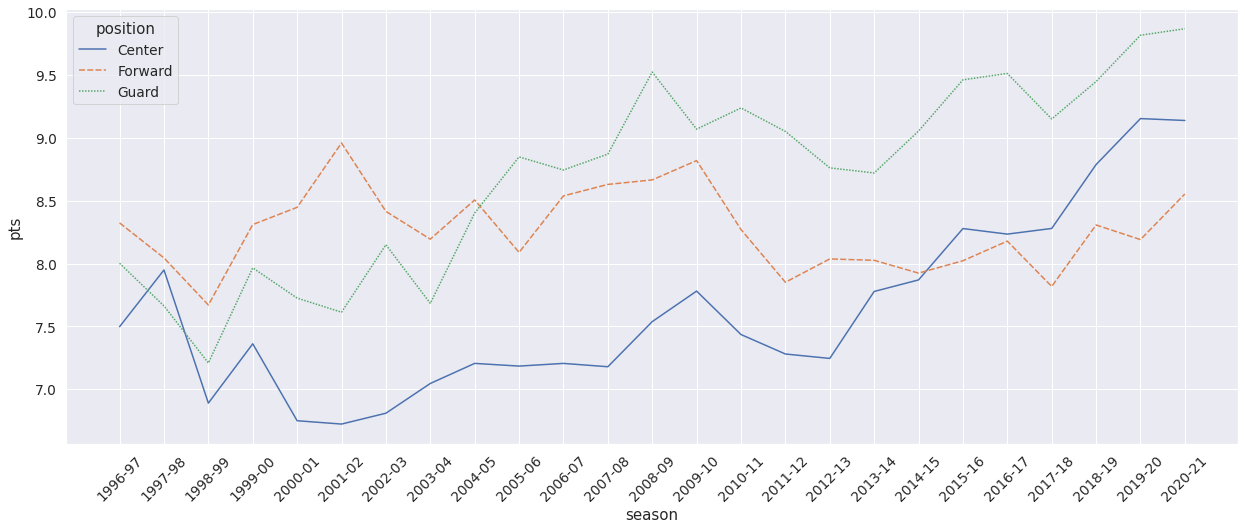

In [38]:
plt.figure(figsize=(21, 8))
plt.xticks(rotation=45)
sns.lineplot(data=nba, x="season", y="pts", hue="position", style="position", ci=None)

<AxesSubplot:xlabel='season', ylabel='reb'>

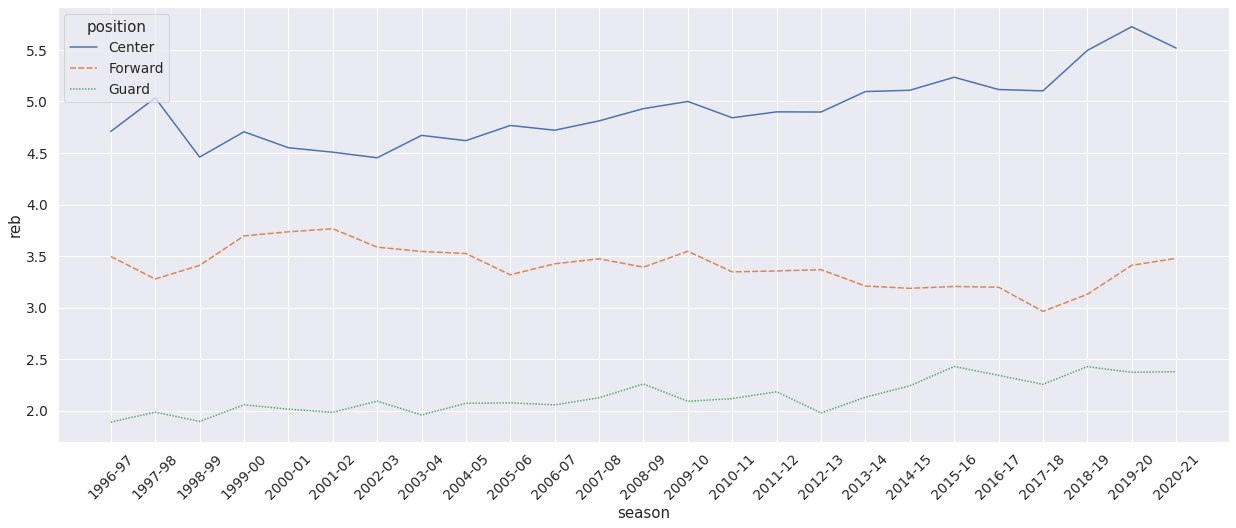

In [39]:
plt.figure(figsize=(21, 8))
plt.xticks(rotation=45)
sns.lineplot(data=nba, x="season", y="reb", hue="position", style="position", ci=None)

<AxesSubplot:xlabel='season', ylabel='ast'>

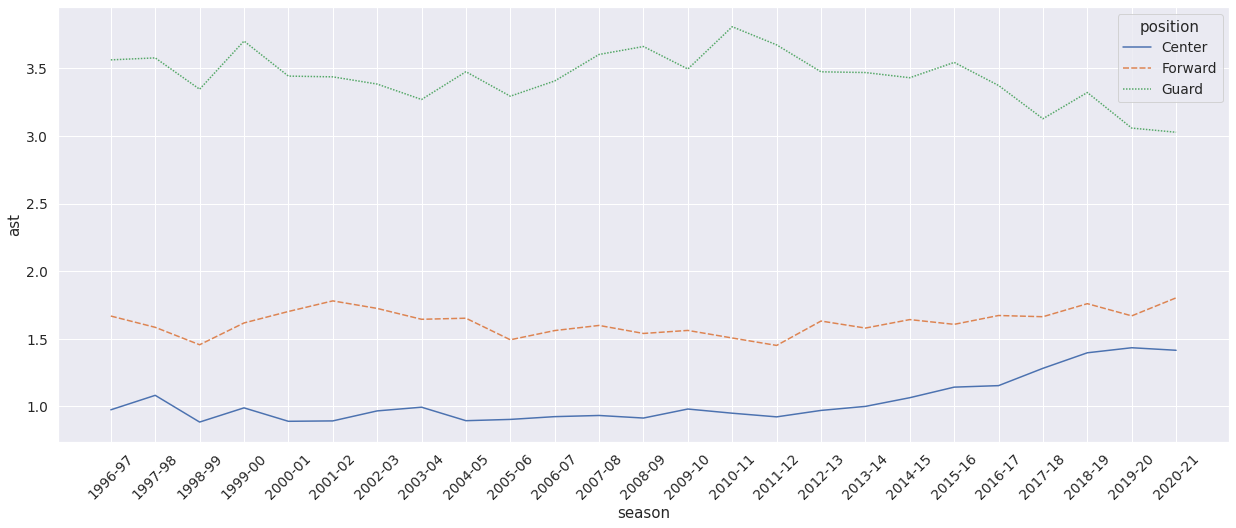

In [40]:
plt.figure(figsize=(21, 8))
plt.xticks(rotation=45)
sns.lineplot(data=nba, x="season", y="ast", hue="position", style="position", ci=None)